# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [152]:
#Imports:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [153]:
#Code:

sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [154]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [155]:

act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The data in the SAT 2017 and ACT 2017 reports both cover every state in the USA and the District of Columbia. The ACT 2017 has national average data while the SAT 2017 does not. 

#### 4a. Does the data look complete? 

Answer: The data in the SAT 2017 and ACT 2017 datasets look complete, as there are no unfilled values.  

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

List of issues with data: 

SAT 2017 ISSUES:

The District of Columbia's participation rate is reported as 100% when it should be 90%. Maryland's math score is incorrectly reported as 52, when it should be 524. Additionally, the total scores for Connecticut, Delware, Idaho, Iowa, Louisiana, Massachusetts, Michigan, Mississippi, New York, Ohio, Rhode Island, South Dakota, Tennessee, and Vermont have all been incorrectly calculated.  


ACT 2017 ISSUES:
Maryland's science score is incorrectly recorded as 2.3 when it should be 23.2 There are rounding errors with calculating the composite of the ACT scores for nearly every state. Additionally, there is an extraneous 'x' character in the Wyoming data total.  

Answer:The minimum possible value of Evidence-Base Reading and Writing and Math from the SAT are both 200. Their maximum values are both 800. Thus, the minimum possible score you can get on the SAT is 400 and the maximum possible score you can get is 1600. From the ACT, the minimum possible values of English, Reading, Math, and Science are all 0. Their maximum values are all 36. Thus, since your ACT score is the average of all 4, the minimum possible score you can get on the ACT is 0 and the maximum possible score is 36.  

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [156]:
sat_2017.loc[20,'Math'] = 524
sat_2017.loc[8,'Participation'] = '90'

act_2017.loc[8,'Science'] = 23.2
act_2017.loc[51,'Participation'] = '100'

act_2017.loc[51,'Composite'] = 20.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [157]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [158]:
act_2017.dtypes


State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: It seems odd that the type of composite in the ACT data is an object. Additionally, the Participation data for the SAT and ACT also should not be objects. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [159]:
sat_2017.Participation = sat_2017.Participation.map(lambda Participation: Participation.replace('%', ''))
act_2017.Participation = act_2017.Participation.map(lambda Participation: Participation.replace('%', ''))

In [160]:
act_2017.loc[50,'Participation']

'100'

- Fix any individual values preventing other columns from being the appropriate type.

In [161]:
act_2017

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8
6,Colorado,100,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31,25.5,24.6,25.6,24.6,25.2
8,Delaware,18,24.1,23.4,24.8,23.2,24.1
9,District of Columbia,32,24.4,23.5,24.9,23.5,24.2


- Finish your data modifications by making sure the columns are now typed appropriately.

In [162]:
#code
sat_2017.Participation = sat_2017.Participation.astype(float)
act_2017.Participation = act_2017.Participation.astype(float)
act_2017.Composite = act_2017.Composite.astype(float)

In [163]:
act_2017.loc[51,'Participation'] = 100


- Display the data types again to confirm they are correct.

In [164]:
#Code:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [165]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [166]:
#code Dictionary Method
new_columns_dictionary_sat_2017 = {
        'Participation':'sat_2017_participation',
        'Evidence-Based Reading and Writing':'sat_2017_english',
        'Math':'sat_2017_math',
        'Total':'sat_2017_total',
    }

new_columns_dictionary_act_2017 = {
        'Participation':'act_2017_participation',
        'English':'act_2017_english',
        'Math':'act_2017_math',
        'Reading':'act_2017_reading',
        'Science':'act_2017_science',
        'Composite':'act_2017_composite',
    }


sat_2017.rename(columns=new_columns_dictionary_sat_2017, inplace=True)
act_2017.rename(columns=new_columns_dictionary_act_2017, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [167]:
#code

#The extra row is the National Row in the ACT 2017 dataset. 
act_2017.drop([0],inplace = True)


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [168]:
#Code:
combined_2017 = pd.merge(sat_2017, act_2017, on='State')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [169]:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [171]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [173]:
sat_2018.Participation = sat_2018.Participation.map(lambda Participation: Participation.rstrip("%"))
act_2018.Participation = act_2018.Participation.map(lambda Participation: Participation.rstrip('%'))

In [174]:
sat_2018.Participation = sat_2018.Participation.astype(float)
act_2018.Participation = act_2018.Participation.astype(float)

In [176]:

act_2018.loc[51,'Participation'] = 100

In [178]:
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [179]:
#code Dictionary Method
new_columns_dictionary_sat_2018 = {
        'Participation':'sat_2018_participation',
        'Evidence-Based Reading and Writing':'sat_2018_english',
        'Math':'sat_2018_math',
        'Total':'sat_2018_total',
    }

new_columns_dictionary_act_2018 = {
        'Participation':'act_2018_participation',
        'Composite':'act_2018_composite',
    }


sat_2018.rename(columns=new_columns_dictionary_sat_2018, inplace=True)
act_2018.rename(columns=new_columns_dictionary_act_2018, inplace=True)

In [180]:
combined_2018 = pd.merge(sat_2018, act_2018, on='State')
final = pd.merge(combined_2017,combined_2018,on = 'State')
final.to_csv('../data/final.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [181]:
final

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519,506,1025,30.0,23.9
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.2,24.1,100.0,505,492,998,17.0,23.8
8,District of Columbia,90.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,97.0,522,493,1014,66.0,19.9


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [182]:
description = final.describe()
description.T

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,51.0,39.607843,34.961738,2.0,4.00,38.0,66.00,100.0
sat_2017_english,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.033333,3.176518,2.3,19.90,21.3,22.75,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [183]:
def standard_deviation_calculator(column):
    average = np.mean(column)
    total = 0
    for i in column:
        total += (i - average) ** 2
        
    updated_total = total / (len(column)-1)
    standard_deviation = updated_total ** 0.5
    return standard_deviation
        
    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [184]:
sd = {
    'sat_2017_participation': standard_deviation_calculator(final['sat_2017_participation']),
    'sat_2017_english' : standard_deviation_calculator(final['sat_2017_english']),
    'sat_2017_math': standard_deviation_calculator(final['sat_2017_math']),
    'sat_2017_total': standard_deviation_calculator(final['sat_2017_participation']),
    'act_2017_participation': standard_deviation_calculator(final['act_2017_participation']),
    'act_2017_english': standard_deviation_calculator(final['act_2017_english']),
    'act_2017_math': standard_deviation_calculator(final['act_2017_math']),
    'act_2017_reading': standard_deviation_calculator(final['act_2017_reading']),
    'act_2017_science': standard_deviation_calculator(final['act_2017_science']),
    'act_2017_composite': standard_deviation_calculator(final['act_2017_composite']),
    'sat_2018_english': standard_deviation_calculator(final['sat_2018_english']),
    'sat_2018_math': standard_deviation_calculator(final['sat_2018_math']),
    'sat_2018_total': standard_deviation_calculator(final['sat_2018_participation']),
    'act_2017_participation': standard_deviation_calculator(final['act_2018_participation']),
    'act_2018_composite': standard_deviation_calculator(final['act_2018_composite'])
}

sd

{'sat_2017_participation': 34.96173818983979,
 'sat_2017_english': 45.66690138768932,
 'sat_2017_math': 47.12139516560329,
 'sat_2017_total': 34.96173818983979,
 'act_2017_participation': 34.08097623567245,
 'act_2017_english': 2.35367713980303,
 'act_2017_math': 1.9819894936505533,
 'act_2017_reading': 2.0672706264873146,
 'act_2017_science': 3.176518009813051,
 'act_2017_composite': 2.020694891154341,
 'sat_2018_english': 45.31767607353539,
 'sat_2018_math': 48.887562073498785,
 'sat_2018_total': 38.0141872380898,
 'act_2018_composite': 2.117686492007581}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Colorado, Connecticut, Delaware, Michigan, and Idaho have the highest participation rates in the 2018 SATs.North Dakota has the lowest participation rate in the 2018 SATs.  

My manually calculated standard deviations do match up with the output from pandas' describe method. They do not match up with numpy's std method. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [185]:
final.sort_values(by=['sat_2017_participation'], ascending=False).head(10)


,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.4
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.2,24.1,100.0,505,492,998,17.0,23.8
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3
8,District of Columbia,90.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,97.0,522,493,1014,66.0,19.9
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,25.4,80.0,562,563,1125,25.0,25.5
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,24.0,97.0,513,505,1018,15.0,24.2


In [186]:
final.sort_values(by=['sat_2017_participation'], ascending=False).tail(10)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,20.4,4.0,633,629,1262,100.0,20.0
41,South Dakota,3.0,612,603,1216,80.0,20.7,21.5,22.3,22.0,21.8,3.0,622,618,1241,77.0,21.9
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,21.4,3.0,629,623,1252,100.0,20.1
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643,655,1298,99.0,21.3
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,20.2,3.0,633,625,1257,100.0,20.0
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640,643,1283,98.0,20.3
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630,606,1236,100.0,18.6
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634,631,1265,68.0,21.8


Michigan, Connecticut, and Delaware have the highest participation rates in the 2017 SATs. North Dakota, Mississippi, and Iowa have the lowest participation rates in the 2017 SATs. 

In [187]:
final.sort_values(by=['sat_2018_participation'], ascending=False).head(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519,506,1025,30.0,23.9
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.2,24.1,100.0,505,492,998,17.0,23.8
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.4
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3


In [188]:
final.sort_values(by=['sat_2018_participation'], ascending=False).tail(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630,606,1236,100.0,18.6
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634,631,1265,68.0,21.8
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,20.2,3.0,633,625,1257,100.0,20.0
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640,643,1283,98.0,20.3


In [189]:
final.sort_values(by=['act_2017_participation'], ascending=False).head(10)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,20.0,4.0,630,618,1248,100.0,20.2
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3,4.0,618,612,1230,100.0,20.4
42,Tennessee,5.0,623,604,1228,100.0,19.5,19.2,20.1,19.9,19.8,6.0,624,607,1231,100.0,19.6
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3
36,Oklahoma,7.0,530,517,1047,100.0,18.5,18.8,20.1,19.6,19.4,8.0,541,521,1062,100.0,19.3
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554,543,1097,100.0,19.1
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574,566,1140,100.0,17.7
26,Montana,10.0,605,591,1196,100.0,19.0,20.2,21.0,20.5,20.3,10.0,606,592,1198,100.0,20.0


In [190]:
final.sort_values(by=['act_2017_participation'], ascending=False).tail(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
38,Pennsylvania,65.0,540,531,1071,23.0,23.4,23.4,24.2,23.3,23.7,70.0,547,539,1086,20.0,23.5
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,24.0,97.0,513,505,1018,15.0,24.2
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.2,24.1,100.0,505,492,998,17.0,23.8
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0


Wyoming, Massachusetts, Colorado, and Connecticut had the highest participation rates in the 2017 ACTs. North Carolina, Minnesota, and Indiana had the lowest participation rates in the 2017 ACTs. 

In [191]:
final.sort_values(by=['act_2018_participation'], ascending=False).head(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,20.0,4.0,630,618,1248,100.0,20.2
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3,4.0,618,612,1230,100.0,20.4
42,Tennessee,5.0,623,604,1228,100.0,19.5,19.2,20.1,19.9,19.8,6.0,624,607,1231,100.0,19.6


In [192]:
final.sort_values(by=['act_2018_participation'], ascending=False).tail(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
38,Pennsylvania,65.0,540,531,1071,23.0,23.4,23.4,24.2,23.3,23.7,70.0,547,539,1086,20.0,23.5
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.2,24.1,100.0,505,492,998,17.0,23.8
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,24.0,97.0,513,505,1018,15.0,24.2
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0


Alabama, Kentucky, Wisconsin, Utah, and Tennessee have the highest participation rates in the 2018 ACTs. Maine, Rhode Island, New Hampshire, Delaware, and Pennsylvania have the lowest participation rates in the 2018 ACTs. 

In [193]:
final.sort_values(by=['sat_2017_total'], ascending=False).head(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643,655,1298,99.0,21.3
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634,631,1265,68.0,21.8
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,20.4,4.0,633,629,1262,100.0,20.0
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,21.7,4.0,633,631,1264,71.0,21.6


In [194]:
final.sort_values(by=['sat_2017_total'], ascending=False).tail(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.4
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.2,24.1,100.0,505,492,998,17.0,23.8
8,District of Columbia,90.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6


Minnesota, Wisconsin, Iowa, Missouri, and Kansas have the highest SAT scores in 2017. The District of Columbia, Delaware, Michigan, Idaho, and Maine have the lowest SAT scores in 2017. 

In [195]:
final.sort_values(by=['sat_2018_total'], ascending=False).head(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643,655,1298,99.0,21.3
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640,643,1283,98.0,20.3
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634,631,1265,68.0,21.8
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,21.7,4.0,633,631,1264,71.0,21.6


In [196]:
final.sort_values(by=['sat_2018_total'], ascending=False).tail(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.4
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3
48,West Virginia,14.0,558,528,1086,69.0,20.0,19.4,21.2,20.5,20.4,28.0,513,486,999,65.0,20.3
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.2,24.1,100.0,505,492,998,17.0,23.8
8,District of Columbia,90.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6


Minnesota, Wisconsin, North Dakota, Iowa, and Kansas have the highest SAT scores in 2018. The District of Columbia, Delaware, West Virginia, Idaho, and Michigan have the lowest SAT scores in 2018. 

In [197]:
final.sort_values(by=['act_2017_composite'], ascending=False).head(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,25.4,80.0,562,563,1125,25.0,25.5
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0
8,District of Columbia,90.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6


In [198]:
final.sort_values(by=['act_2017_composite'], ascending=False).tail(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554,543,1097,100.0,19.1
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,550,549,1099,89.0,18.9
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630,606,1236,100.0,18.6
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574,566,1140,100.0,17.7


New Hampshire, Massachusetts, Connecticut, Maine, and the District of Columbia had the highest ACT composite scores in 2017. Nevada, Mississippi, South Carolina, Hawaii, and North Carolina had the lowest ACT composite scores in 2017. 

In [199]:
final.sort_values(by=['act_2018_composite'], ascending=False).head(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,25.4,80.0,562,563,1125,25.0,25.5
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
32,New York,67.0,528,523,1052,31.0,23.8,24.0,24.6,23.9,24.2,79.0,534,534,1068,27.0,24.5
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.4


In [200]:
final.sort_values(by=['act_2018_composite'], ascending=False).tail(5)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,550,549,1099,89.0,18.9
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630,606,1236,100.0,18.6
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574,566,1140,100.0,17.7


Connecticut, Massachusetts, New Hampshire, New York, and Michigan had the highest ACT Composite Scores in 2018. Nevada, South Carolina, Mississippi, Hawaii, and Alabama had the lowest ACT Composite scores in 2018. 

Do any states with 100% participation on a given test have a rate change year-to-year?
Do any states show have >50% participation on both tests either year?

In [201]:
final.loc[(final.sat_2017_participation == 100) & (final.sat_2018_participation != 100)]

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite


In [202]:
final.loc[(final.sat_2017_participation != 100) & (final.sat_2018_participation == 100)]

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519,506,1025,30.0,23.9
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3


In [203]:
final.loc[(final.act_2017_participation == 100) & (final.act_2018_participation != 100)]



,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519,506,1025,30.0,23.9
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643,655,1298,99.0,21.3


In [204]:
final.loc[(final.act_2017_participation != 100) & (final.act_2018_participation == 100)]

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,21.4,3.0,629,623,1252,100.0,20.1
35,Ohio,12.0,578,570,1149,75.0,21.2,21.6,22.5,22.0,22.0,18.0,552,547,1099,100.0,20.3


For the SAT's, there were no states that had a 100 percent participation rate in 2017 and did not have a 100 percent participation rate in 2018. Additionally, Colorado had a participation rate of 11 percent in 2017 and Idaho had a participation rate of 93 in 2017 and their participation rates both increased to 100 for 2018.  For the ACT's, Colorado, Connecticut, and Massachusetts had a 100 percent participation rate in 2017 which lowered to a respective 30 percent, 26 percent, and 25 percent participation rate in 2018. There were 16 states that went up to a 100 percent ACT participation rate in 2018 from 2017. 

In [205]:
final.loc[(final.sat_2017_participation >= 50) & (final.act_2017_participation >= 50)]

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,97.0,522,493,1014,66.0,19.9
10,Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4,70.0,542,522,1064,53.0,21.4
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,550,549,1099,89.0,18.9
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3


In [206]:
final.loc[(final.sat_2018_participation >= 50) & (final.act_2018_participation >= 50)]

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,97.0,522,493,1014,66.0,19.9
10,Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4,70.0,542,522,1064,53.0,21.4
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,550,549,1099,89.0,18.9
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554,543,1097,100.0,19.1
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3


In 2017, there were 14 states that had a greater than 50 percent participation rate in both the SATs and ACTs. In 2018, that number decreased to 5. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [207]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(12,12),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_title(list_of_titles[i]) 


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

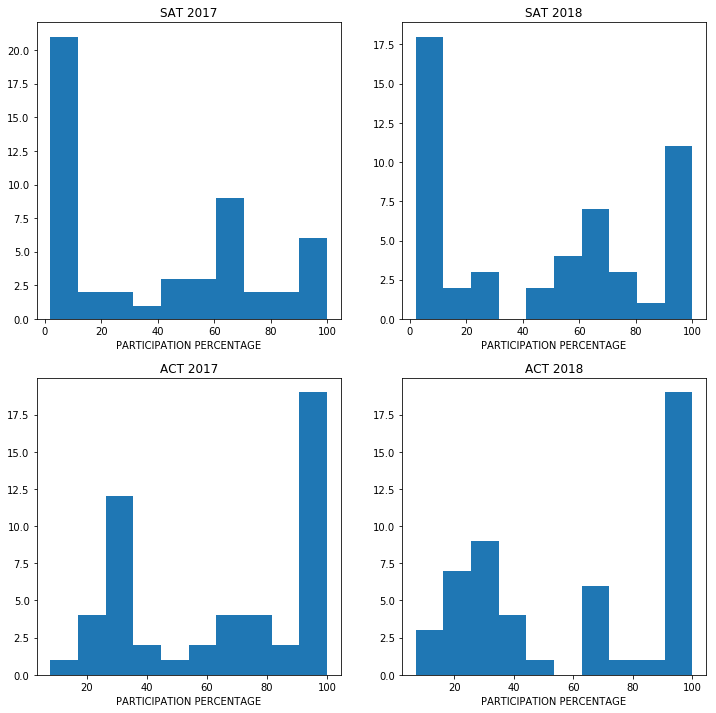

In [208]:
subplot_histograms(final,['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation'],['SAT 2017','SAT 2018','ACT 2017','ACT 2018'],['PARTICIPATION PERCENTAGE','PARTICIPATION PERCENTAGE','PARTICIPATION PERCENTAGE','PARTICIPATION PERCENTAGE'])

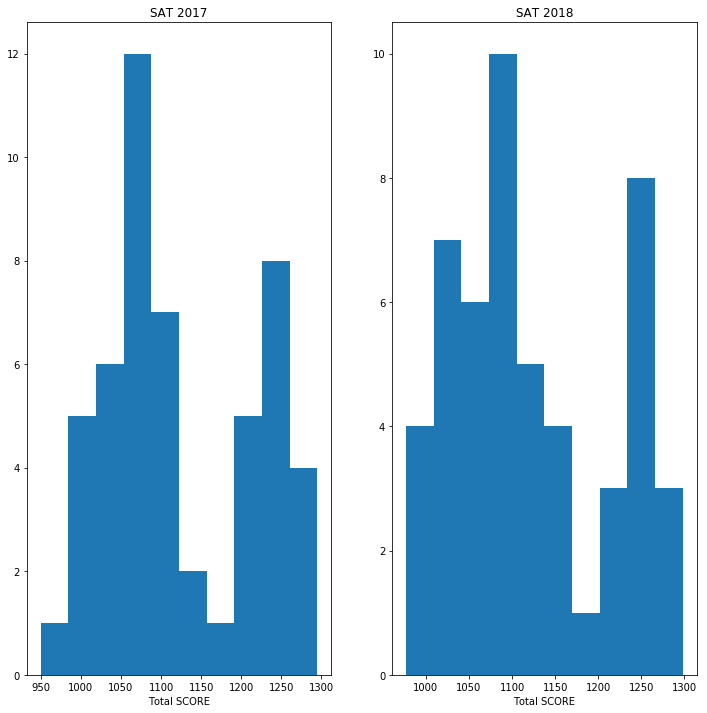

In [209]:

subplot_histograms(final,['sat_2017_total','sat_2018_total'],['SAT 2017','SAT 2018'], ['Total SCORE','Total SCORE'])


In [210]:
final.head(1)


,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017 Done
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017 Done
- Total scores for SAT 2017 vs. 2018 Done
- Composite scores for ACT 2017 vs. 2018 Done

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


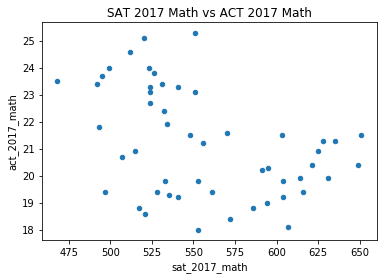

In [211]:
final.plot.scatter('sat_2017_math','act_2017_math',title = 'SAT 2017 Math vs ACT 2017 Math')

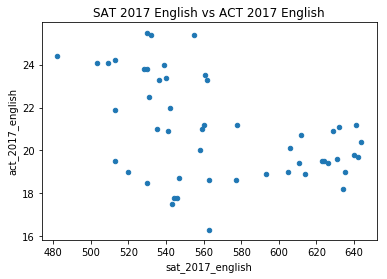

In [212]:
final.plot.scatter('sat_2017_english','act_2017_english',title = 'SAT 2017 English vs ACT 2017 English')

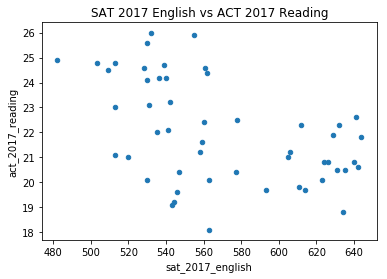

In [213]:
final.plot.scatter('sat_2017_english','act_2017_reading',title = 'SAT 2017 English vs ACT 2017 Reading')

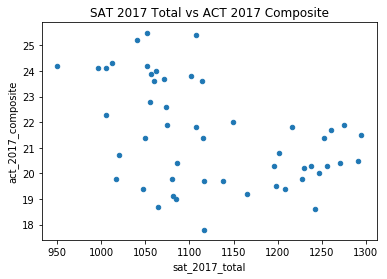

In [214]:
final.plot.scatter('sat_2017_total','act_2017_composite',title = 'SAT 2017 Total vs ACT 2017 Composite')

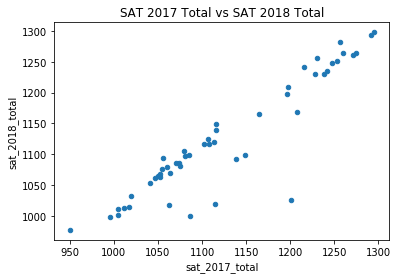

In [215]:
final.plot.scatter('sat_2017_total','sat_2018_total',title = 'SAT 2017 Total vs SAT 2018 Total')

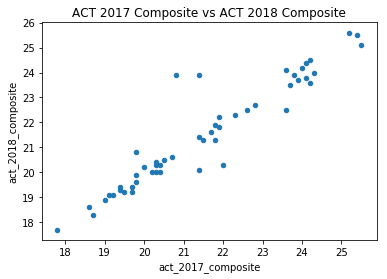

In [216]:
final.plot.scatter('act_2017_composite','act_2018_composite',title = 'ACT 2017 Composite vs ACT 2018 Composite')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [217]:
final.head(1)

,State,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1


Text(0.5, 1.0, 'SAT 2017 Participation Box Plot')

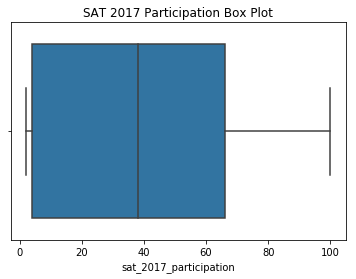

In [218]:
sns.boxplot(x=final["sat_2017_participation"]).set_title('SAT 2017 Participation Box Plot')

Text(0.5, 1.0, 'SAT 2017 English Box Plot')

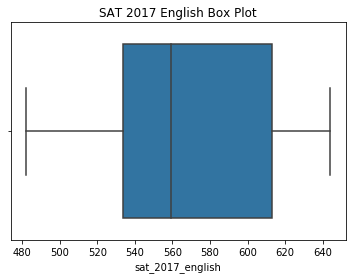

In [219]:
sns.boxplot(x=final["sat_2017_english"]).set_title('SAT 2017 English Box Plot')

Text(0.5, 1.0, 'SAT 2017 Math Box Plot')

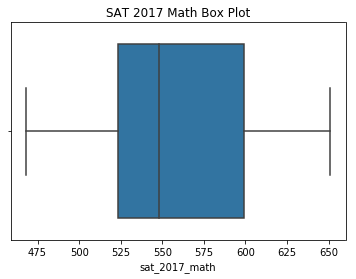

In [220]:
sns.boxplot(x=final["sat_2017_math"]).set_title('SAT 2017 Math Box Plot')

Text(0.5, 1.0, 'SAT 2017 Total Box Plot')

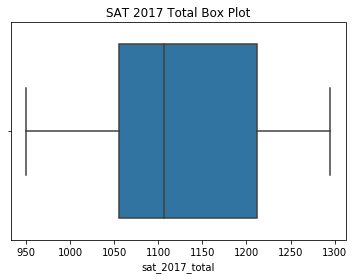

In [221]:
sns.boxplot(x=final["sat_2017_total"]).set_title('SAT 2017 Total Box Plot')

Text(0.5, 1.0, 'ACT 2017 Participation Box Plot')

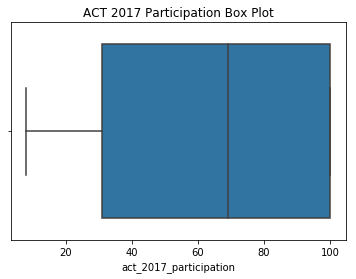

In [222]:
sns.boxplot(x=final["act_2017_participation"]).set_title('ACT 2017 Participation Box Plot')

Text(0.5, 1.0, 'ACT 2017 English Box Plot')

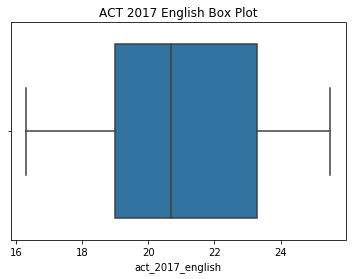

In [223]:
sns.boxplot(x=final["act_2017_english"]).set_title('ACT 2017 English Box Plot')

Text(0.5, 1.0, 'ACT 2017 Math Box Plot')

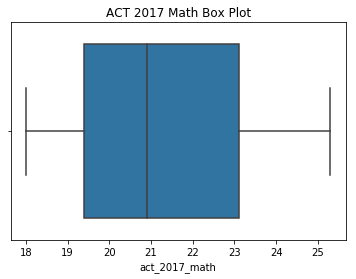

In [224]:
sns.boxplot(x=final["act_2017_math"]).set_title('ACT 2017 Math Box Plot')

Text(0.5, 1.0, 'ACT 2017 Reading Box Plot')

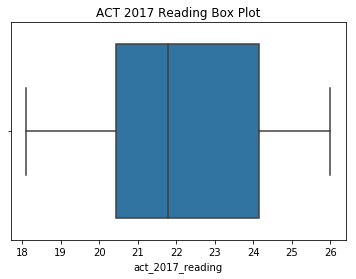

In [225]:
sns.boxplot(x=final["act_2017_reading"]).set_title('ACT 2017 Reading Box Plot')

Text(0.5, 1.0, 'ACT 2017 Science Box Plot')

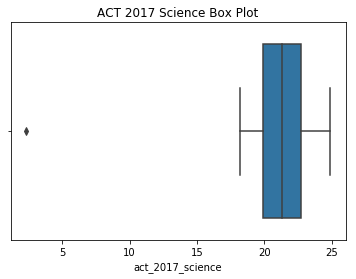

In [226]:
sns.boxplot(x=final["act_2017_science"]).set_title('ACT 2017 Science Box Plot')

Text(0.5, 1.0, 'ACT 2017 Composite Box Plot')

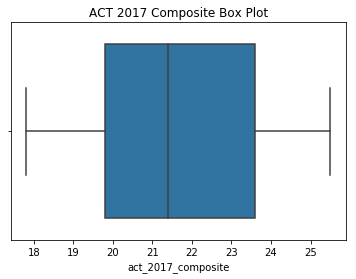

In [227]:
sns.boxplot(x=final["act_2017_composite"]).set_title('ACT 2017 Composite Box Plot')

Text(0.5, 1.0, 'SAT 2018 Participation Box Plot')

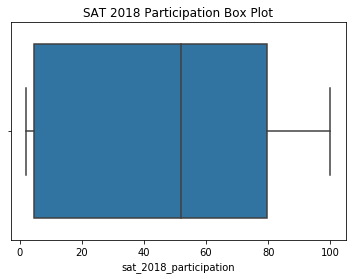

In [228]:
sns.boxplot(x=final["sat_2018_participation"]).set_title('SAT 2018 Participation Box Plot')

Text(0.5, 1.0, 'SAT 2018 English Box Plot')

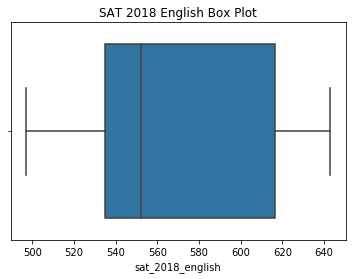

In [229]:
sns.boxplot(x=final["sat_2018_english"]).set_title('SAT 2018 English Box Plot')

Text(0.5, 1.0, 'SAT 2018 Math Box Plot')

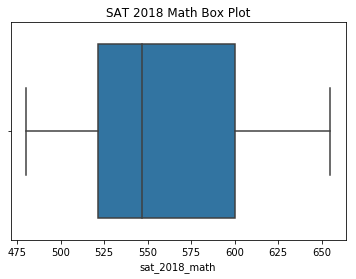

In [230]:
sns.boxplot(x=final["sat_2018_math"]).set_title('SAT 2018 Math Box Plot')

Text(0.5, 1.0, 'SAT 2018 Total Box Plot')

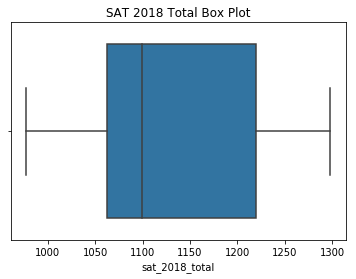

In [231]:
sns.boxplot(x=final["sat_2018_total"]).set_title('SAT 2018 Total Box Plot')

Text(0.5, 1.0, 'ACT 2018 Participation Box Plot')

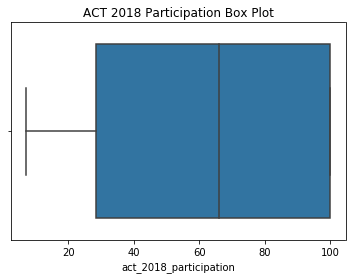

In [232]:

sns.boxplot(x=final["act_2018_participation"]).set_title('ACT 2018 Participation Box Plot')

Text(0.5, 1.0, 'ACT 2018 Composite Box Plot')

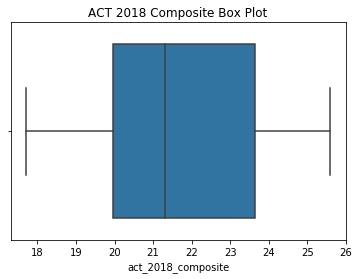

In [233]:

sns.boxplot(x=final["act_2018_composite"]).set_title('ACT 2018 Composite Box Plot')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers: For the 2017 SAT, the data appears to be skewed to the right, since the means of the participation percentage, math, english, and total are all greater than the medians. For the 2017 ACT, the data appears to be normally distributed, since the means of the participation percentage, math, english, reading, science, and composite are all very similar to the medians. For the 2018 SAT, the participation rate is skewed to the left, and the math, english, and total are all skewed to the right. For the 2018 ACT, the participation is skewed to the left and the composite is skewed to the right. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

The assumption does not hold true for SAT 2017, SAT 2018, and ACT 2018. Thus, our estimates for the 2017 SAT will be biased to the right for the participation percentage, math, english, and total data. Our estimates for the 2017 ACT will not be biased. Our estimates for the 2018 SAT will be biased to the left for participation and biased to the left for math, english, and the total. Our estimates for the 2018 ACT will be biased to the left for participation and biased to the right for composite.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It does not make sense, as there isn't much correlation

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: I do not think it appropriate to compare the 2017 SAT and ACT math scores, as they do not have a strong positive or negative correlation. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [69]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

I feel that Colorado, Wisconsin, and Wyoming are very interesting, since their SAT participation rates drastically changed from 2017 to 2018. According to the Education Commission of the States, this is because those states made participation in the SAT or ACT mandatory. 

Source: https://www.ecs.org/wp-content/uploads/State-Information-Request_Use-of-ACT-SAT-and-PSAT-for-High-School-Testing-as-Required-by-ESSA.pdf

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Given the fact that more and more states are making either the SAT or the ACT mandatory, I suggest that we focus on lobbying the state education boards that have not yet decided on either test in order to convince them to make the SAT their primary test. Additionally, in order to counteract the drop in scores that might happen because of the increased population that comes with mandatory SAT testing, I suggest that we subsidize states that haven't yet converted with free PSAT testing and further emphasize our partnership with Khan Academy and the free SAT test prep they provide. Wisconsin, which had 7000 students graduating this year, could be a good testbed, due to its relatively small graduating class size. 

Source: https://portals.edu.wyoming.gov/Reports/Public/wde-reports-2012/public-reports/gradrates/fedfouryearadjustedstate